In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_datos = pd.read_csv('././VW_VOTARON_2020PLEB_Datos completos.csv',delimiter=';')

In [4]:
df_datos.head()

,Cedula,Circunscripcion,Comuna,DV,Edad,Nacionalidad,Pais Domicilio,Pais Nacimiento,Partido,Provincia,Rango Edad,Region,Sexo,Sufragio,VotoExterior,Número de registros,Votaron
0,0,Coyhaique,Coyhaique,0,22,chilena,Chile,Chile,[130] FEDERACION REGIONALISTA VERDE SOCIAL,Coyhaique,20-24,De Aysen Del General Carlos Ibañez Del Campo,femenino,sufragó,Nacional,1,1.0
1,0,El Puerto,Valparaiso,0,89,chilena,Chile,Chile,SIN PARTIDO,Valparaiso,80 o +,De Valparaiso,femenino,no sufragó,Nacional,1,NaN
2,0,Iquique,Iquique,0,99,chilena,Chile,Chile,SIN PARTIDO,Iquique,80 o +,De Tarapaca,masculino,no sufragó,Nacional,1,NaN
3,0,Rio Tranquilo,Rio Ibañez,0,22,chilena,Chile,Chile,SIN PARTIDO,General Carrera,20-24,De Aysen Del General Carlos Ibañez Del Campo,masculino,sufragó,Nacional,1,1.0
4,0,El Puerto,Valparaiso,0,95,chilena,Chile,Chile,SIN PARTIDO,Valparaiso,80 o +,De Valparaiso,masculino,no sufragó,Nacional,1,NaN


In [76]:
# Como se compone el padrón electoral de la votación? cuál es el rango etario, afiliación politica?
# Cuál fue la participación por región respecto del padrón electoral?
# Cuál fue la participación por partido en la votación respecto del padrón electoral?
# Cuál fue la participación por Genero en las votaciones?
# Cuál fue la participación fuera de Chile en la votaciones?

In [249]:
#creando dataframe para padrón electoral por rango de edad
df_padron_rango_edad = df_datos.groupby('Rango Edad').count()['Cedula'].reset_index()

In [250]:
df_padron_rango_edad

,Rango Edad,Cedula
0,18 a 19,492646
1,20-24,1300929
2,25-29,1443380
3,30-34,1468700
4,35-39,1335268
5,40-44,1240095
6,45-49,1313503
7,50-54,1283966
8,55-59,1265358
9,60-64,1061520


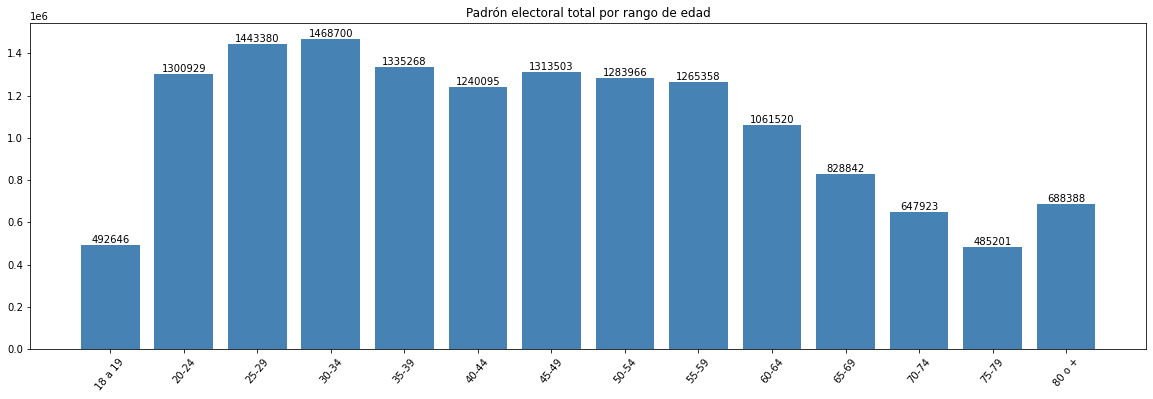

In [279]:
#mostramos el padrón electoral por randgo de edad
plt.bar(df_padron_rango_edad['Rango Edad'],df_padron_rango_edad['Cedula'],
       color='steelblue')

plt.title('Padrón electoral total por rango de edad')
plt.xticks(rotation=50)

         
for i,txt in enumerate(df_padron_rango_edad['Cedula']):
    plt.annotate(txt,(df_padron_rango_edad['Rango Edad'][i],df_padron_rango_edad['Cedula'][i]),
                 horizontalalignment= 'center',
                verticalalignment='bottom')            

plt.rcParams["figure.figsize"] = (20, 6)  
plt.show()

In [159]:
#creando dataframe para padrón electoral por partido
df_padron_partido = df_datos.groupby('Partido').count()['Cedula'].reset_index()

df_padron_partido['militantes']=df_padron_partido['Cedula']


df_padron_partido = df_padron_partido.drop(['Cedula'], axis=1)

In [160]:
#mostramos cantidad de militantes por partido político en padrón electoral
df_padron_partido

,Partido,militantes
0,SIN PARTIDO,13965452
1,[126] NUEVO TIEMPO,1666
2,[130] FEDERACION REGIONALISTA VERDE SOCIAL,13150
3,[135] PARTIDO TRABAJADORES REVOLUCIONARIOS,3082
4,[137] PARTIDO LIBERAL DE CHILE,10300
5,[138] CIUDADANOS,19244
6,[139] PARTIDO PROGRESISTA DE CHILE,60723
7,[140] REGIONALISTA INDEPENDIENTE DEMOCRATA,23334
8,[142] ECOLOGISTA VERDE,16928
9,[143] COMUNES,14918


In [161]:
#nos quedamos unicamente con la cantidad de militantes por partido, excluyendo a quienes no militan en ningún partido
df_militantes_pp = df_padron_partido.iloc[1:]

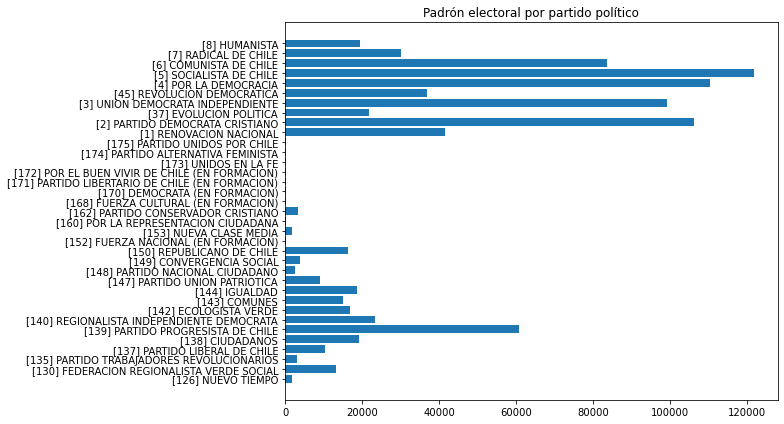

In [259]:
#Mostramos el padrón electoral de los militantes por partido político
plt.barh(df_militantes_pp['Partido'],df_militantes_pp['militantes'])

plt.rcParams["figure.figsize"] = (40, 6)  

plt.title('Padrón electoral por partido político')

plt.tight_layout() 
plt.show()

In [47]:
#dataframe inicial para el % de la participación por region
df_participacion_reg = df_datos.groupby('Region').count()[['Cedula','Votaron']].reset_index()
#agregamos el % de participación como columna a nuestro dataframe
df_participacion_reg['participacion'] = np.round(df_participacion_reg['Votaron']*100/df_participacion_reg['Cedula'],2)

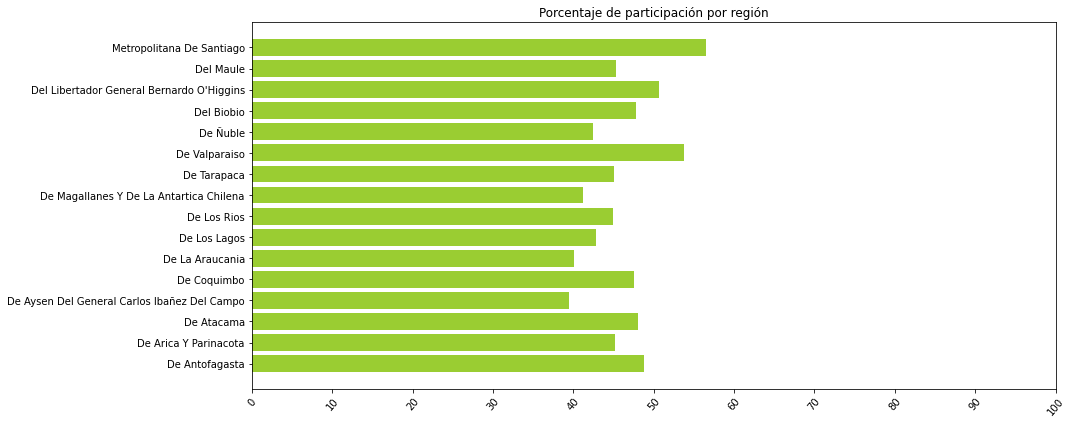

In [315]:
#mostramos el porcentaje de participación por región
plt.barh(df_participacion_reg['Region'],df_participacion_reg['participacion'],
         color='yellowgreen')

plt.rcParams["figure.figsize"] = (15, 6)  



plt.xticks(rotation=50)    

plt.title('Porcentaje de participación por región')
plt.xticks(np.arange(0,110,10))

plt.tight_layout() 
plt.show()

In [175]:
#dataframe inicial para el % de la participación por partido político
df_participacion_pp = df_datos.groupby('Partido').count()[['Cedula','Votaron']].reset_index()
#agregamos el % de participación como columna a nuestro dataframe
df_participacion_pp['participacion'] = np.round(df_participacion_pp['Votaron']*100/df_participacion_pp['Cedula'],2)

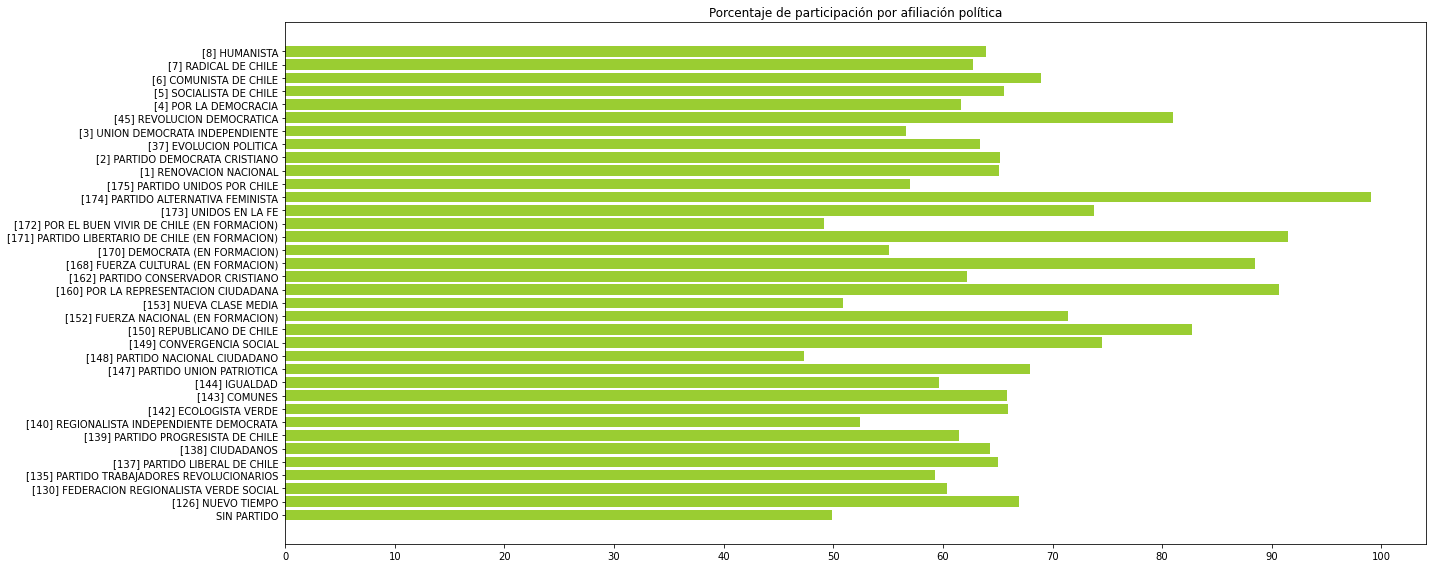

In [331]:
#mostramos el porcentaje de participación por región
plt.barh(df_participacion_pp['Partido'],df_participacion_pp['participacion'],
         color='yellowgreen')

plt.rcParams["figure.figsize"] = (20,8)  

plt.title('Porcentaje de participación por afiliación política')
plt.xticks(np.arange(0,110,10))



plt.tight_layout() 
plt.show()

In [270]:
#dataframe inicial para el % de la participación por rango etario
df_participacion_edad = df_datos.groupby('Rango Edad').count()[['Cedula','Votaron']].reset_index()
#agregamos el % de participación como columna a nuestro dataframe
df_participacion_edad['participacion'] = np.round(df_participacon_edad['Votaron']*100/df_participacon_edad['Cedula'],2)

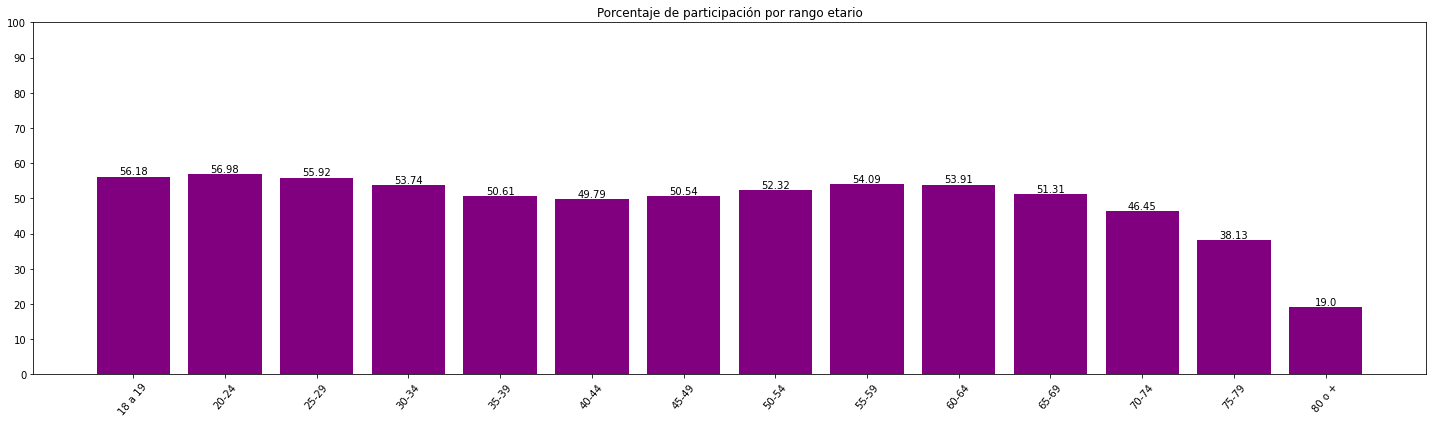

In [278]:
#mostramos el porcentaje de participación por rango etario
plt.bar(df_participacon_edad['Rango Edad'],df_participacion_edad['participacion'],
         color='purple')

plt.rcParams["figure.figsize"] = (20, 6)  



plt.xticks(rotation=50)    

plt.title('Porcentaje de participación por rango etario')
plt.yticks(np.arange(0,110,10))


for i,txt in enumerate(df_participacion_edad['participacion']):
    plt.annotate(txt,(df_participacon_edad['Rango Edad'][i],df_participacion_edad['participacion'][i]),
                 horizontalalignment= 'center',
                verticalalignment='bottom') 

plt.tight_layout() 
plt.show()

In [282]:
#dataframe inicial para el % de la participación por genero
df_participacion_gen = df_datos.groupby('Sexo').count()[['Cedula','Votaron']].reset_index()

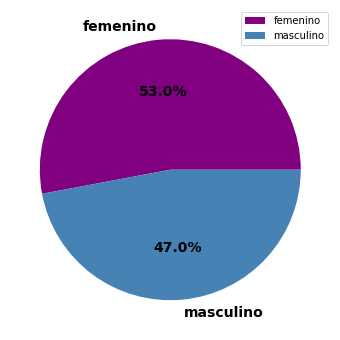

In [293]:
#mostramos el porcentaje de votación por genero
plt.pie(df_participacion_gen['Votaron'],
       labels=df_participacion_gen['Sexo'],
       autopct='%1.1f%%',
       colors=['purple','steelblue'],
       textprops=dict(weight='bold',size=14))

plt.legend()
plt.show()

In [317]:
#dataframe inicial para el % de la participación dentro y fuera de chile
df_participacion_ext = df_datos.groupby('VotoExterior').count()[['Cedula','Votaron']].reset_index()

In [318]:
#agregamos el % de participación como columna a nuestro dataframe
df_participacion_ext['participacion'] = np.round(df_participacion_ext['Votaron']*100/df_participacion_ext['Cedula'],2)

In [319]:
df_participacion_ext

,VotoExterior,Cedula,Votaron,participacion
0,Exterior,59522,30936,51.97
1,Nacional,14796197,7511123,50.76


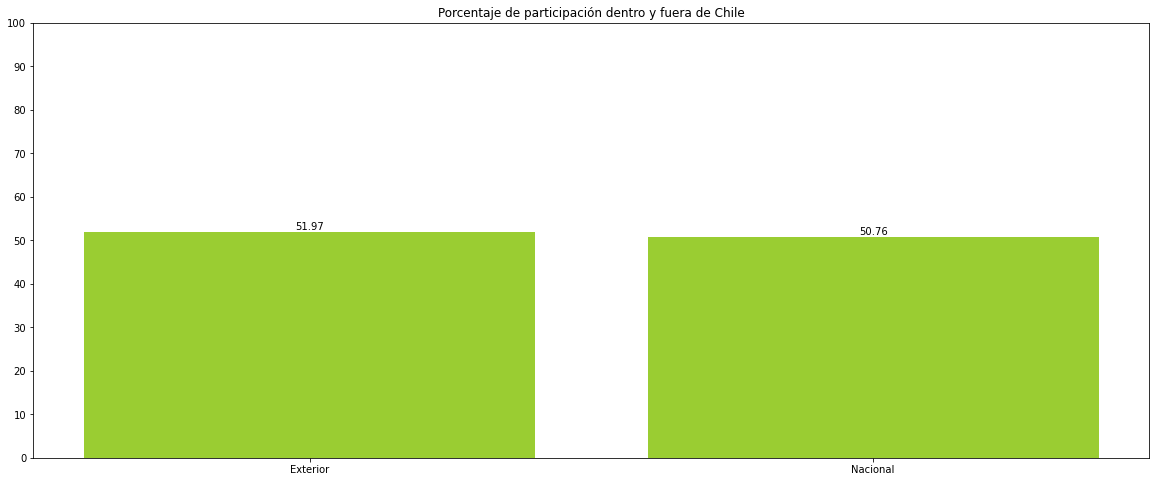

In [339]:
#mostramos el porcentaje de participación por región
plt.bar(df_participacion_ext['VotoExterior'],df_participacion_ext['participacion'],
         color='yellowgreen')

#plt.rcParams["figure.figsize"] = (20,8)  

plt.title('Porcentaje de participación dentro y fuera de Chile')
plt.yticks(np.arange(0,110,10))


for i,txt in enumerate(df_participacion_ext['participacion']):
    plt.annotate(txt,(df_participacion_ext['VotoExterior'][i],df_participacion_ext['participacion'][i]),
                 horizontalalignment= 'center',
                verticalalignment='bottom') 


#plt.tight_layout() 
plt.show()